#**Car Price Prediction with Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pickle
from flask import Flask, request, jsonify

In [ ]:
# Load the dataset
data = pd.read_csv('/content/car data.csv')

# Display the first few rows
print(data.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
# Handling missing values for numeric and non-numeric columns separately
# Fill numeric columns with the mean
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill non-numeric columns with the mode
categorical_columns = data.select_dtypes(exclude=['number']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

print("Missing values handled successfully.")

Missing values handled successfully.


In [ ]:
# Check for null values and data types
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [ ]:
print(data.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [ ]:
# Check correlation
print(data.corr())

                             Year  Selling_Price  Present_Price  Driven_kms  \
Year                     1.000000       0.236141      -0.047192   -0.524342   
Selling_Price            0.236141       1.000000       0.878914    0.029187   
Present_Price           -0.047192       0.878914       1.000000    0.203618   
Driven_kms              -0.524342       0.029187       0.203618    1.000000   
Owner                   -0.182104      -0.088344       0.008058    0.089216   
...                           ...            ...            ...         ...   
Car_Name_xcent           0.059276       0.006038      -0.005797   -0.024550   
Fuel_Type_Diesel         0.064315       0.552339       0.473390    0.172515   
Fuel_Type_Petrol        -0.059959      -0.540571      -0.465326   -0.172874   
Selling_type_Individual -0.039896      -0.550724      -0.512121   -0.101419   
Transmission_Manual      0.000394      -0.367128      -0.348776   -0.162510   

                            Owner  Car_Name_Activa 

                   Year  Selling_Price  Present_Price  Driven_kms
Year           1.000000       0.236141      -0.047192   -0.524342
Selling_Price  0.236141       1.000000       0.878914    0.029187
Present_Price -0.047192       0.878914       1.000000    0.203618
Driven_kms    -0.524342       0.029187       0.203618    1.000000


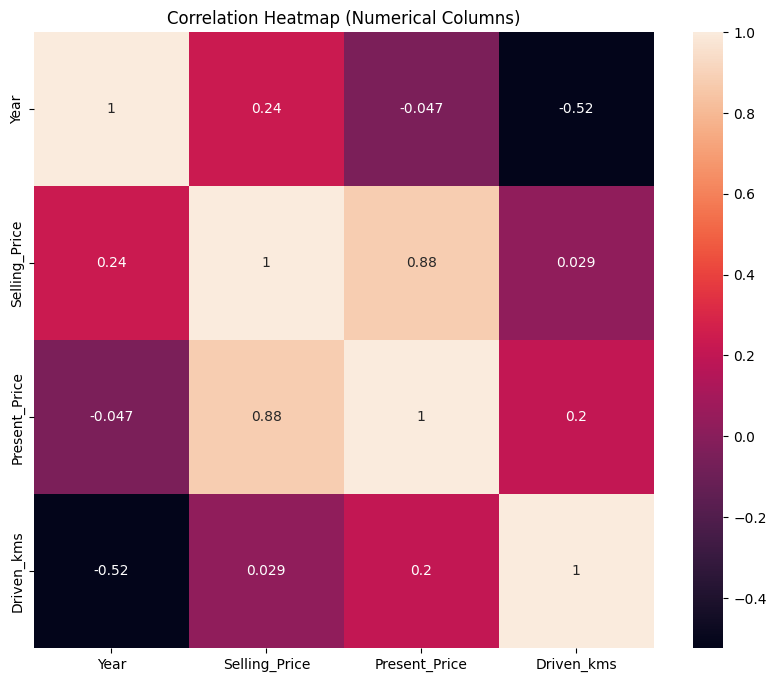

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your columns are 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven' based on the provided global variables
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']

# Filter your data using the confirmed column names
numerical_data = data[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

Observation Selling Price and Present Price have a very strong positive correlation indicating a nearly perfect linear relationship. This makes sense as present market value likely influences selling price.

Year seems has a very week correlatation with present price and negative correlation with Selling Price, this also makes sense as newer cars (lower Year values) tend to have higher selling prices, lower present prices, and lower driven kilometers.

Driven_Kms shows a weak positive correlation with Selling Price and Present Price.

<Figure size 1000x600 with 0 Axes>

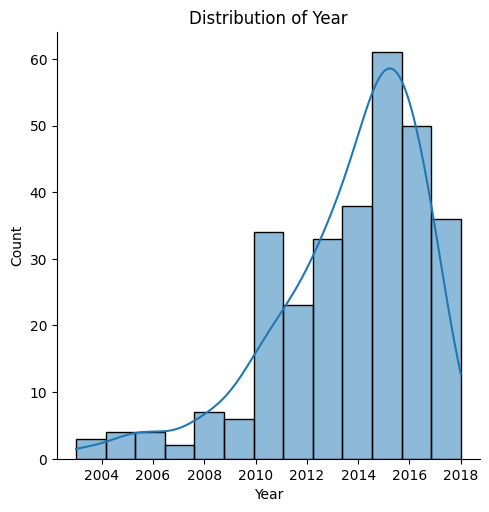

<Figure size 1000x600 with 0 Axes>

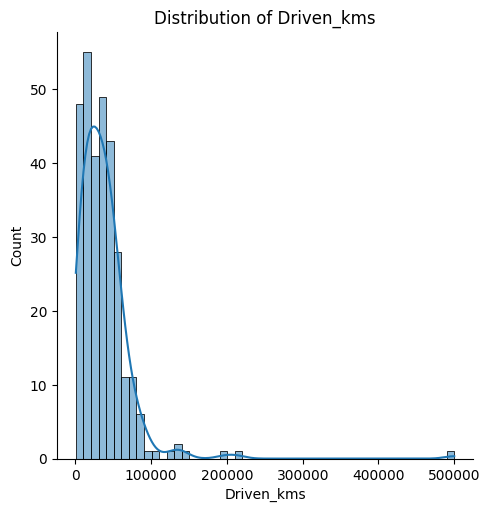

<Figure size 1000x600 with 0 Axes>

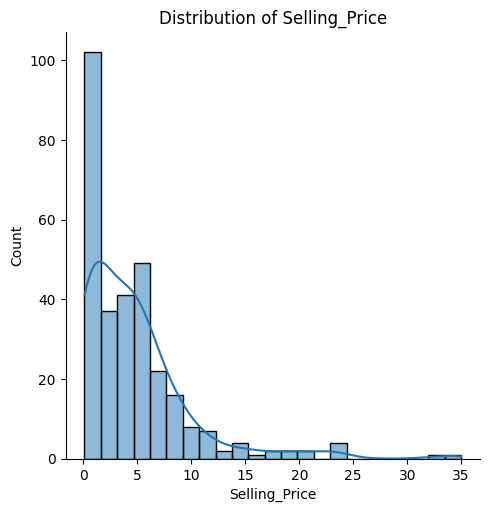

<Figure size 1000x600 with 0 Axes>

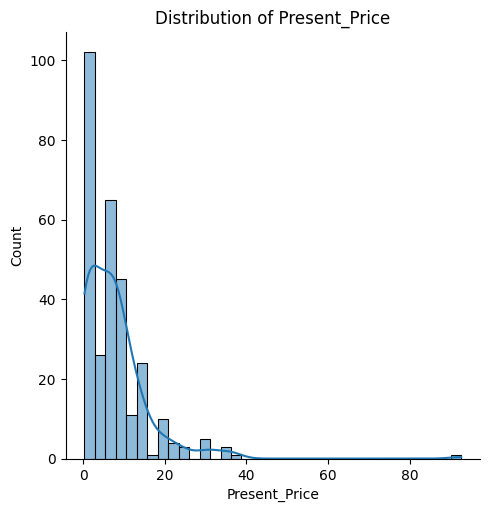

In [ ]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

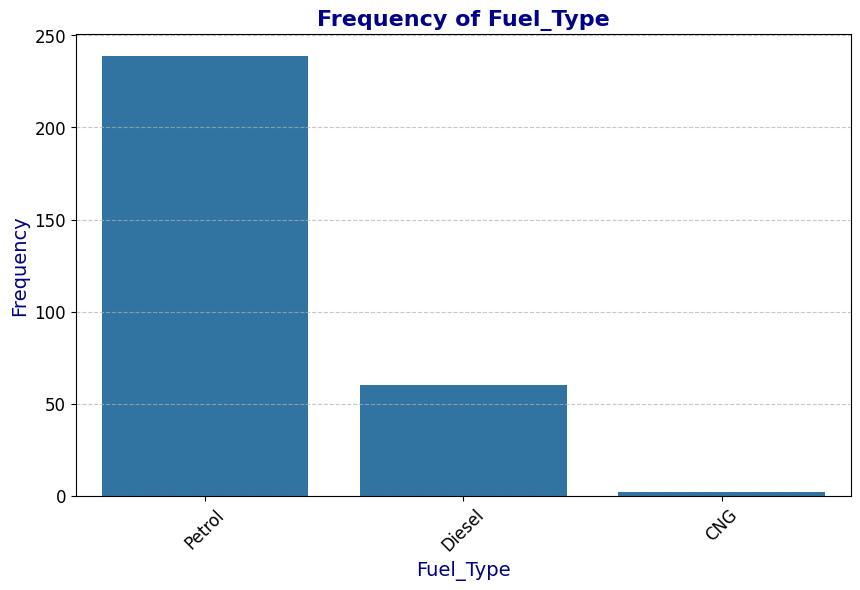

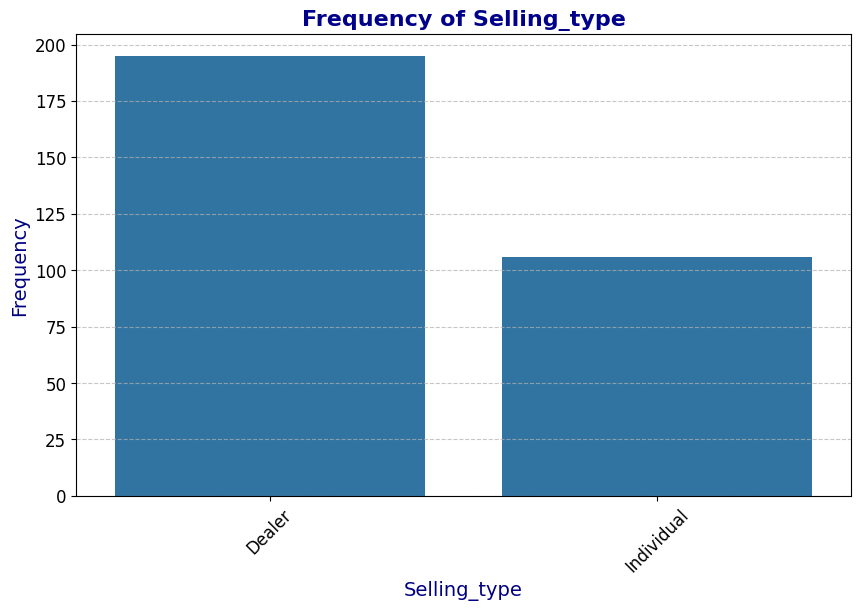

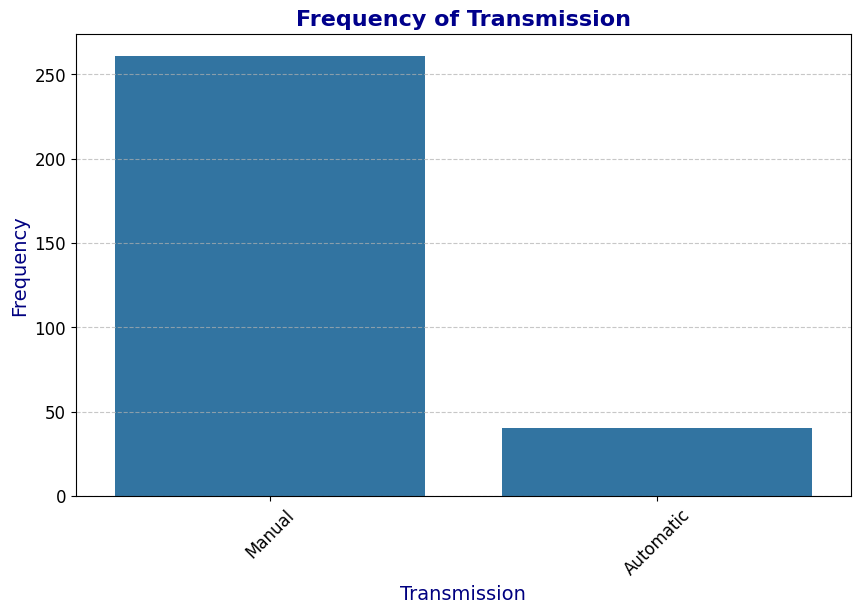

In [ ]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Frequency of {feature}', fontsize=16, color='darkblue', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='navy')
    plt.ylabel('Frequency', fontsize=14, color='navy')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

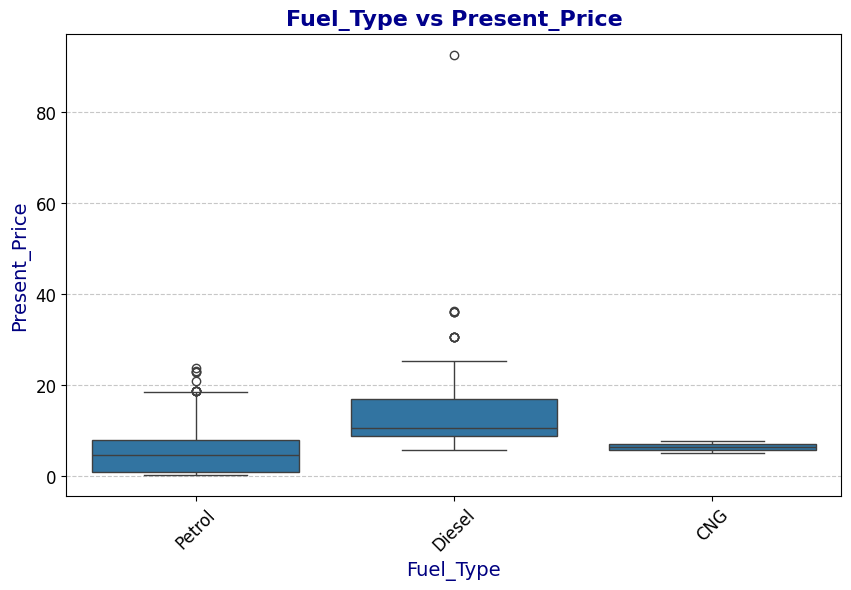

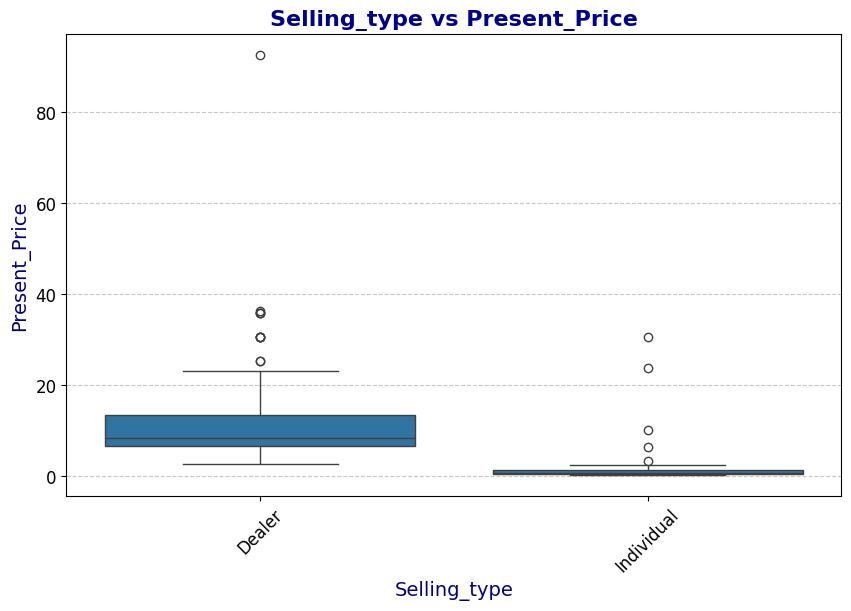

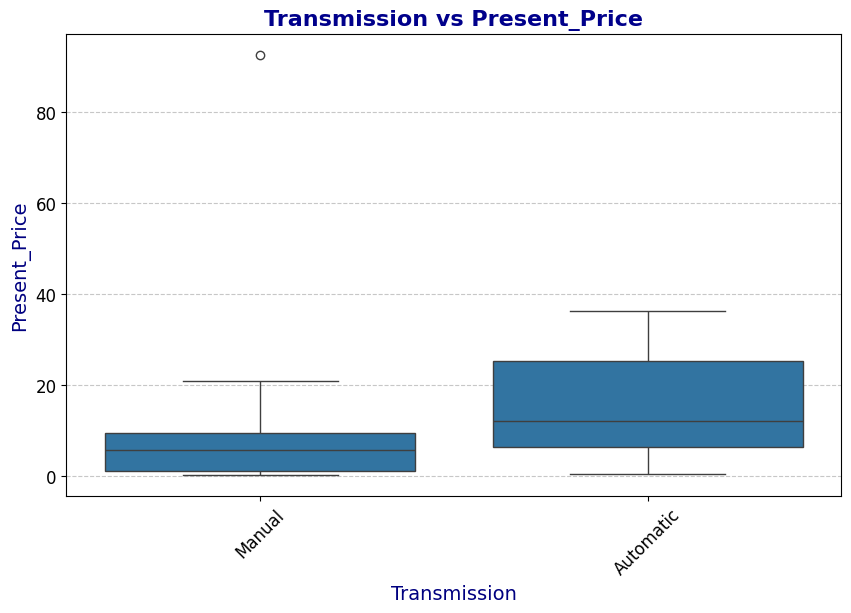

In [ ]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Present_Price', data=data)
    plt.title(f'{feature} vs Present_Price', fontsize=16, color='darkblue', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='navy')
    plt.ylabel('Present_Price', fontsize=14, color='navy')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

<ipython-input-72-5d50beb1a52e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='viridis')


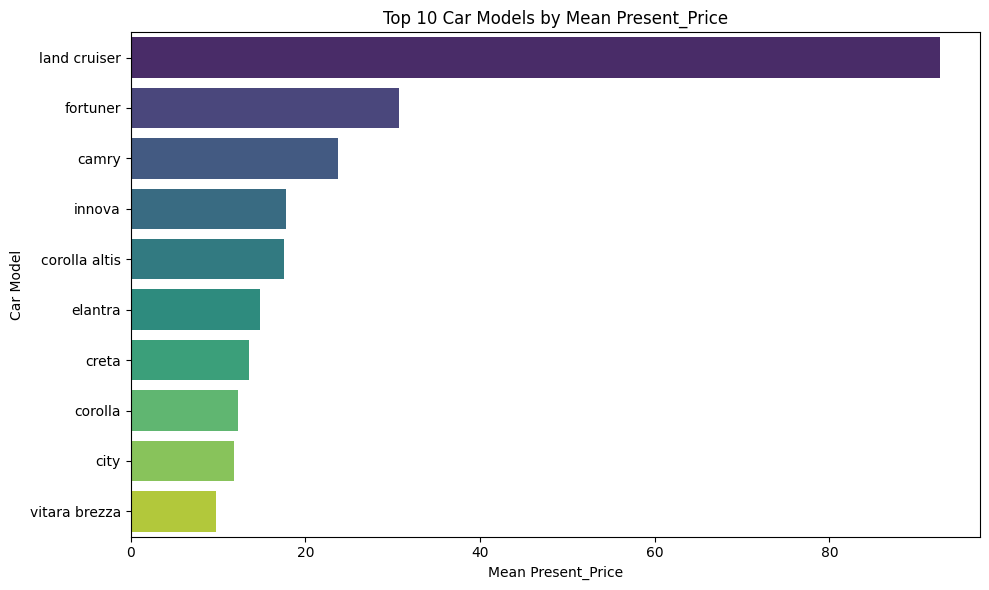

In [ ]:
top_car_models = data.groupby('Car_Name')['Present_Price'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='viridis')
plt.title(f'Top {10} Car Models by Mean Present_Price')
plt.xlabel('Mean Present_Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [ ]:
# encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-73-5bf30a01b83b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-73-5bf30a01b83b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-73-5bf30a01b83b>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [ ]:
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Import the necessary class from scikit-learn
from sklearn.linear_model import LinearRegression

# Now you can create an instance of the class
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 3.5315798889713346
R-squared: 0.8466902419662656


Second model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = Ridge(alpha=1.0)


In [ ]:
model.fit(X_train, y_train)

# Evaluate the model

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 3.5168046464637905
R-squared: 0.8473316514557678


Test the prediction

In [ ]:
new_car = [[2024, 20000, 0, 1, 1, 0, 0]]
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 8849.50519424892


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


----
new code

In [ ]:
# Data Transformation
# One-hot encoding categorical variables (if any)
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Step 2: Normalization/Standardization
scaler = StandardScaler()  # or MinMaxScaler() for normalization
# Replace 'Selling_Price' with the actual name of your target column from 'car data.csv'
features = data.drop('Selling_Price', axis=1)
target = data['Selling_Price']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Apply scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Import necessary libraries
from sklearn.feature_selection import SelectKBest, f_regression # Import f_regression here

# Apply MinMaxScaler instead of other scalers
scaler = MinMaxScaler()  # Using MinMaxScaler to ensure non-negative values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Feature Selection
# Selecting top 10 features
# Use f_regression for continuous target variables
selector = SelectKBest(score_func=f_regression, k=10)  # Changed score_func to f_regression
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


In [ ]:
# Step 5: Model Selection
# Use RandomForestRegressor for continuous target variables
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor

model = RandomForestRegressor(random_state=42) # Change to RandomForestRegressor# Step 6: Model Training


In [ ]:

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model Evaluation for Regression
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R²):", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 0.5425061293260475
Mean Squared Error (MSE): 0.711820654462578
Root Mean Squared Error (RMSE): 0.8436946452731451
R-squared (R²): 0.9690990843390325
